In [1]:
from keras.datasets import imdb
import numpy as np
from keras import models
from keras import layers
import matplotlib.pyplot as plt
from keras import optimizers
from keras import losses 
from keras import metrics
from keras import regularizers

Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

(25000,)
(25000,)
(25000,)
(25000,)


In [3]:
def vectorize_sequences(sequences, dimension=10000): 
    results = np.zeros((len(sequences), dimension)) 
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. 
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [4]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

这个惩罚项只在训练时添加，所以这个网络的训练损失会 比测试损失大很多

In [5]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(10000,))) 
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001))) 
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [6]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001), 
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [7]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000] 
partial_y_train = y_train[10000:]

In [8]:
history = model.fit(partial_x_train, partial_y_train, epochs=10, batch_size=512, 
                    validation_data=(x_val, y_val))
history_dict = history.history

Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 3s 205us/step - loss: 0.6596 - binary_accuracy: 0.6798 - val_loss: 0.5093 - val_binary_accuracy: 0.8531
Epoch 2/10
15000/15000 [==============================] - 2s 109us/step - loss: 0.5073 - binary_accuracy: 0.8107 - val_loss: 0.4042 - val_binary_accuracy: 0.8775
Epoch 3/10
15000/15000 [==============================] - 1s 84us/step - loss: 0.4220 - binary_accuracy: 0.8591 - val_loss: 0.3562 - val_binary_accuracy: 0.8851
Epoch 4/10
15000/15000 [==============================] - 1s 84us/step - loss: 0.3692 - binary_accuracy: 0.8889 - val_loss: 0.3408 - val_binary_accuracy: 0.8860
Epoch 5/10
15000/15000 [==============================] - 1s 82us/step - loss: 0.3375 - binary_accuracy: 0.9046 - val_loss: 0.3346 - val_binary_accuracy: 0.8882
Epoch 6/10
15000/15000 [==============================] - 1s 83us/step - loss: 0.3073 - binary_accuracy: 0.9195 - val_loss: 0.3390 - val_binary

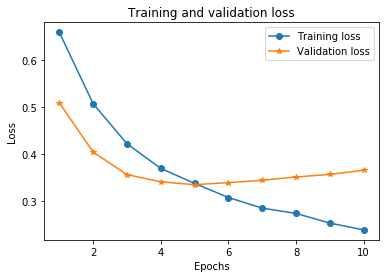

In [9]:
history_dict = history.history 
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, '-o', label='Training loss') 
plt.plot(epochs, val_loss_values, '-*', label='Validation loss') 
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

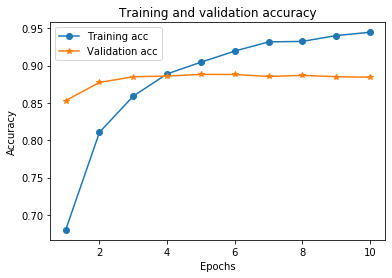

In [10]:
plt.clf()
acc = history_dict['binary_accuracy'] 
val_acc = history_dict['val_binary_accuracy']
plt.plot(epochs, acc, '-o', label='Training acc') 
plt.plot(epochs, val_acc, '-*', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.xlabel('Epochs')
plt.ylabel('Accuracy') 
plt.legend()
plt.show()

In [11]:
results = model.evaluate(x_test, y_test)
print(results)

25000/25000 [==============================] - 3s 136us/step
[0.3805445855903625, 0.8784800171852112]
